### task 6.4 linear regression

#### 2020 US E-Commerce Data Set
#### How to increase profitability?

#### Hypothesis:
If sales in high priced items are increased then profits will increase.

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Remove outliers, remodel and test
#### 6. Normalize variables, remodel and test
#### 7. Remove unprofitable values, remodel and test normalized variables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 6\2 data\prepared data\task_6.2.csv", index_col = [0])

### 2 cleaning

In [3]:
#checking head,tail,shape
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,prof_cat
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,low profit
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,high profit
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,low profit
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,profit loss
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,profit loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,low profit
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,low profit
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,low profit
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,low profit


In [4]:
#check data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 3311
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

In [5]:
#change data type of order date, row id, postal code

df['Order Date'] = df['Order Date'].astype('datetime64') 
df['Row ID'] = df['Row ID'].astype('string')
df['Postal Code'] = df['Postal Code'].astype('string')

In [6]:
#check
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,prof_cat
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,low profit
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,high profit
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,low profit
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,profit loss
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,profit loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,low profit
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,low profit
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,low profit
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,low profit


#### check for duplicates and missing values

In [7]:
#check for dups 
df.duplicated().value_counts()


False    3312
dtype: int64

In [8]:
#check for missing values again

df.isnull().sum() 

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
prof_cat        0
dtype: int64

In [9]:
#view stats for df
df.describe()

,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000
mean,221.381418,3.766908,0.156467,28.212340
std,585.257531,2.221776,0.207429,241.864342
min,0.444000,1.000000,0.000000,-3839.990400
25%,17.018000,2.000000,0.000000,1.763200
50%,53.810000,3.000000,0.200000,8.296800
75%,205.105700,5.000000,0.200000,28.315125
max,13999.960000,14.000000,0.800000,6719.980800


#### insight:
    *large difference between the sales and profit mean and median, indicating data is shaped with a large tail and includes technical outliers. the outlier values passed quality checks and are reasonable for product type being expensive printers etc. 
    *next step normalizing the data for modeling, evaluate price and profit per unit

#### view profit spread

<Axes: xlabel='Profit', ylabel='Count'>

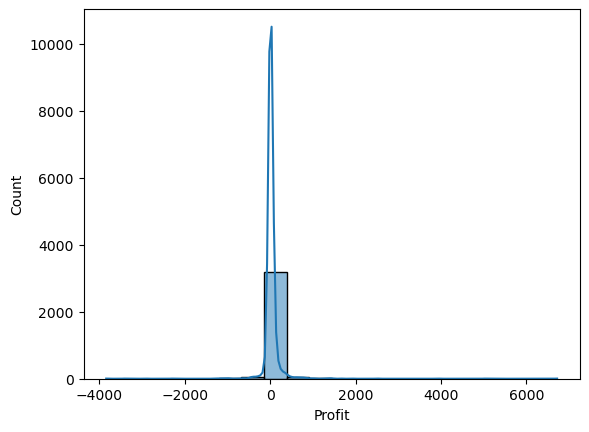

In [10]:
sns.histplot(df['Profit'],bins = 20, kde = True) #seaborn histogram

### 3 data prep for modeling

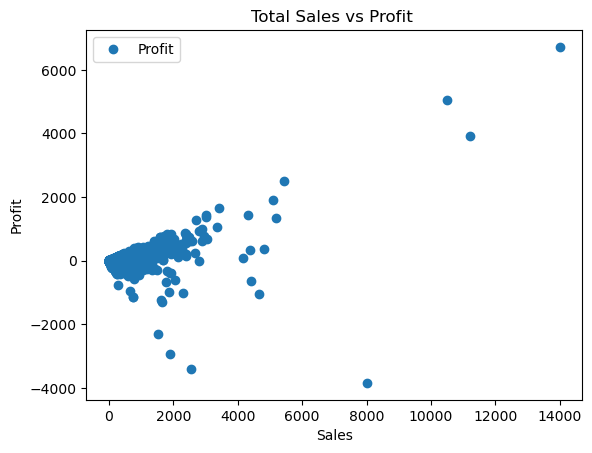

In [11]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Sales = independent variable 
#Profit = dependent variable being studied
df.plot(x = 'Sales', y='Profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Sales vs Profit ')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Sales'].values.reshape(-1,1)
y = df['Profit'].values.reshape(-1,1)

In [13]:
X

array([[ 48.896],
       [474.43 ],
       [  3.6  ],
       ...,
       [ 13.904],
       [ 20.72 ],
       [  3.024]])

In [14]:
y

array([[  8.5568],
       [199.2606],
       [  1.728 ],
       ...,
       [  4.5188],
       [  6.475 ],
       [ -0.6048]])

In [15]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4 modeling data with linear regression

In [16]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [17]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

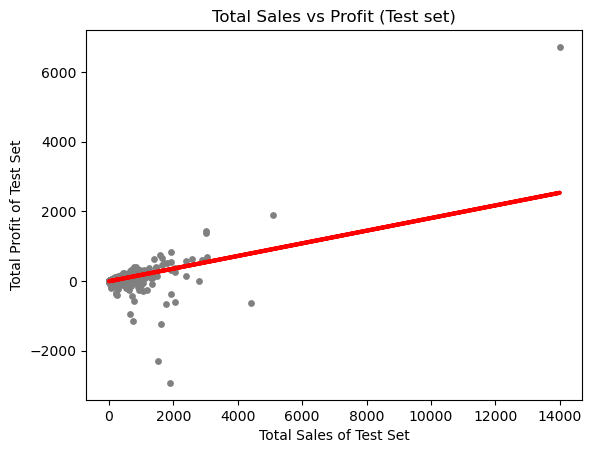

In [19]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Sales vs Profit (Test set)')
plot_test.xlabel('Total Sales of Test Set')
plot_test.ylabel('Total Profit of Test Set')
plot_test.show()

In [20]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [21]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.18159289]]
Mean squared error:  53276.84984566039
R2 score:  0.3515636631065119


In [22]:
y_predicted

array([[ 3.65732267e+00],
       [ 5.86258668e+00],
       [ 9.60521606e+00],
       [-7.37335560e+00],
       [-3.38121760e+00],
       [-8.38155931e+00],
       [-8.40189771e+00],
       [-5.68236265e+00],
       [ 4.22825070e+00],
       [ 1.27903902e+02],
       [ 4.20086507e+01],
       [-8.32780781e+00],
       [-6.98329408e+00],
       [-9.40538000e+00],
       [ 2.92597405e+01],
       [-4.87318475e+00],
       [ 3.91173287e+01],
       [ 1.20120104e+02],
       [ 1.12759055e+02],
       [-8.23192677e+00],
       [ 1.26270292e+02],
       [ 2.13669873e+01],
       [-8.83772064e+00],
       [-6.64008353e+00],
       [-5.29811210e+00],
       [ 2.02371307e+00],
       [-9.09158749e+00],
       [-9.96650202e+00],
       [ 8.12308981e+01],
       [-2.93377272e+00],
       [-7.10314539e+00],
       [ 1.76051091e+01],
       [ 2.41410002e+01],
       [-5.57776515e+00],
       [-2.94648423e+00],
       [ 1.22183377e+01],
       [-9.73551587e+00],
       [-3.89839414e+00],
       [ 4.5

In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,-53.7432,3.657323
1,14.4495,5.862587
2,47.0979,9.605216
3,5.6112,-7.373356
4,13.7808,-3.381218
5,2.8296,-8.381559
6,3.6288,-8.401898
7,7.9200,-5.682363
8,37.5624,4.228251
9,-1141.4700,127.903902


In [24]:
# view prdicted profit in descending order
# sort the data frame by 'Predicted' column in descending order
data_sorted = data.sort_values(by='Predicted', ascending=False)

data_sorted.head(30)

,Actual,Predicted
805,6719.9808,2532.008489
459,1906.4850,912.926316
669,-630.8820,791.661129
108,679.9960,545.386310
477,1439.9760,534.484926
684,1379.9770,534.484926
181,609.7157,514.178665
142,0.0000,498.887272
577,621.9744,460.324207
654,150.2940,426.392487


##### Compare how the regression fits the training set

In [25]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.18159289]]
Mean squared error:  37760.70202887088
R2 score:  0.21860470678314292


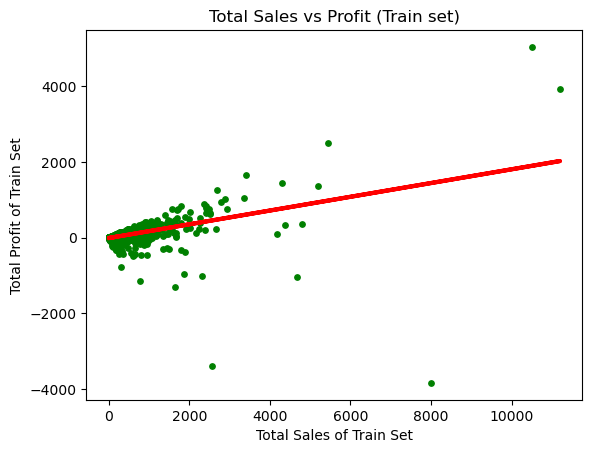

In [28]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Sales vs Profit (Train set)')
plot_test.xlabel('Total Sales of Train Set')
plot_test.ylabel('Total Profit of Train Set')
plot_test.show()

#### summary insight
    * while the model has a positive slope which was hypothesized, the mean squared error is quite large indicating the model has poorly predicted profit based on sales. as well, r-squared value suggests a 22% accuracy score which is makes the forcasting unacceptable. 

## 5 subset data, remove outliers 
    *refit and test model performace
    *study goal: understanding the affect outliers have on model fitment

In [65]:
#create a subset the profit reducing outliers above 200 and below -200
sub_test = df[['Sales','Profit']][(df['Profit'] > -2000) & (df['Profit'] < 2000)]

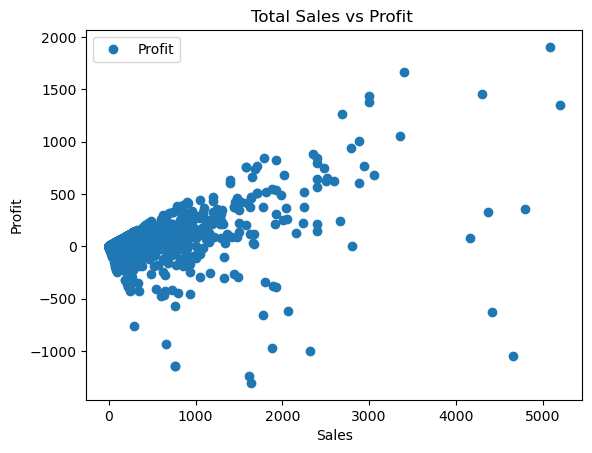

In [66]:
sub_test.plot(x = 'Sales', y='Profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Sales vs Profit ')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

In [67]:
# reshape excluding outliers

X_2 = sub_test['Sales'].values.reshape(-1,1)
y_2 = sub_test['Profit'].values.reshape(-1,1)

In [68]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [69]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [70]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [71]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [72]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.15643796]]
Mean squared error:  10864.891249755918
R2 score:  0.2583026492637077


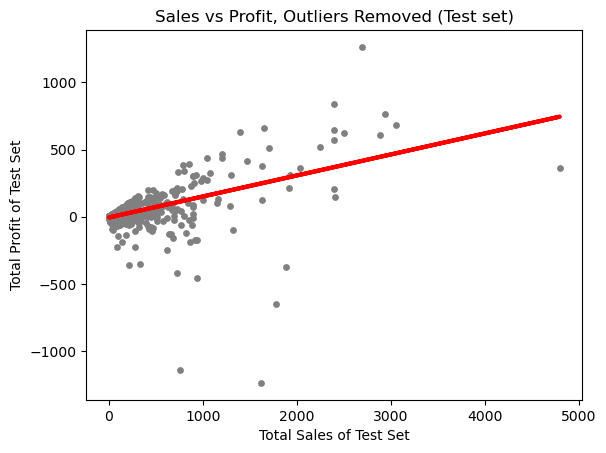

In [73]:
#visualize the test results 
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Sales vs Profit, Outliers Removed (Test set)')
plot_test.xlabel('Total Sales of Test Set')
plot_test.ylabel('Total Profit of Test Set')
plot_test.show()

In [74]:
# view predicted profit vs the actual profit of test set
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,-53.7432,3.657323
1,14.4495,5.862587
2,47.0979,9.605216
3,5.6112,-7.373356
4,13.7808,-3.381218
5,2.8296,-8.381559
6,3.6288,-8.401898
7,7.9200,-5.682363
8,37.5624,4.228251
9,-1141.4700,127.903902


#### insight:
    *With outliers removed, the model did not improve its r2 score. Also, the mse actually increased which indicates the model is poorly fitted to dataset and not suitable to forecast. 

## 6 normalize profit and price
    * create clomuns for price per unity and profit per unit
    * create and test a model on these variables 
    * study goal: understanding the affect normalizing has on model

In [39]:
#solve for price per unit, derive new column
df['unit_price'] = (df['Sales'] / df['Quantity'])/(1-df['Discount'])

In [40]:
#solve for profit per unit, derive new column 
df['unit_profit'] = (df['Profit'] / df['Quantity'])/(1-df['Discount'])

In [41]:
#check head and tail 
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,prof_cat,unit_price,unit_profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,low profit,15.28,2.674000
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,high profit,43.13,18.114600
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,low profit,1.80,0.864000
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,profit loss,113.64,-26.989500
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,profit loss,70.71,-93.690750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,...,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,low profit,12.99,0.389700
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,...,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,low profit,21.99,8.246250
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,low profit,8.69,2.824250
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,...,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,low profit,12.95,4.046875


<Axes: xlabel='unit_profit', ylabel='Count'>

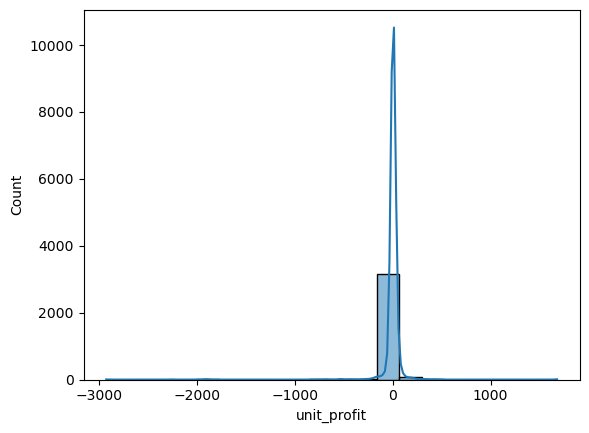

In [42]:
sns.histplot(df['unit_profit'],bins = 20, kde = True)

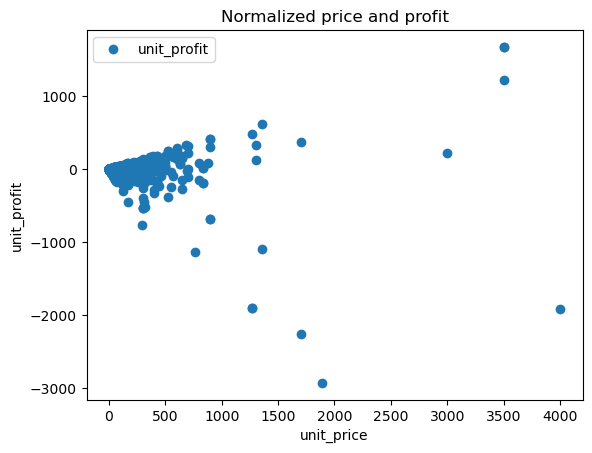

In [43]:
df.plot(x = 'unit_price', y='unit_profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Normalized price and profit')  
plt.xlabel('unit_price')  
plt.ylabel('unit_profit')  
plt.show()

In [44]:
# reshape 

X_3 = df['unit_price'].values.reshape(-1,1)
y_3 = df['unit_profit'].values.reshape(-1,1)

In [45]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [46]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_3, y_train_3)

LinearRegression()

In [47]:
# Predict.

y_predicted_3 = regression.predict(X_test_3)

In [48]:
rmse = mean_squared_error(y_test_3, y_predicted_3)
r2 = r2_score(y_test_3, y_predicted_3)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.02137553]]
Mean squared error:  19443.861865366056
R2 score:  0.0007693338987987408


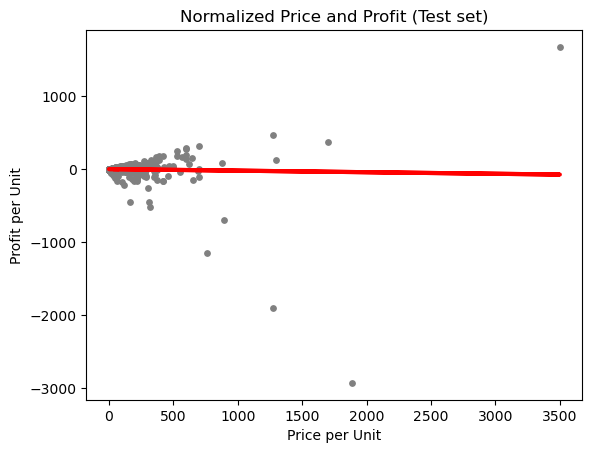

In [50]:
#visualize the test results 
plot_test = plt
plot_test.scatter(X_test_3, y_test_3, color='gray', s = 15)
plot_test.plot(X_test_3, y_predicted_3, color='red', linewidth =3)
plot_test.title('Normalized Price and Profit (Test set)')
plot_test.xlabel('Price per Unit')
plot_test.ylabel('Profit per Unit')
plot_test.show()

In [51]:
# view predicted profit vs actual profit of test set 
data3 = pd.DataFrame({'Actual': y_test_3.flatten(), 'Predicted': y_predicted_3.flatten()})
data3.head(30)

,Actual,Predicted
0,-44.786000,2.616912
1,3.612375,3.509341
2,15.699300,3.204098
3,2.338000,3.841731
4,2.871000,3.815225
5,2.829600,3.760504
6,2.268000,3.846006
7,1.650000,3.871656
8,9.390600,3.557436
9,-1141.470000,-12.281835


#### Insight:
    * normalizing decreased slope indicating a weaker functional relationship
    * increased mse, and decreased r2 suggest it is a worse fitting model for the data than non-normalized variables
    * next step, reshape and model excluding negative profit 

### 7 subset data, remove negative profit 
    *refit and test model performace
    *study goal: understanding the affect negative profit has on model fitment

In [52]:
df.describe()

,Sales,Quantity,Discount,Profit,unit_price,unit_profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,221.381418,3.766908,0.156467,28.212340,74.739224,1.536479
std,585.257531,2.221776,0.207429,241.864342,190.299694,114.385897
min,0.444000,1.000000,0.000000,-3839.990400,0.990000,-2929.484500
25%,17.018000,2.000000,0.000000,1.763200,6.480000,0.750356
50%,53.810000,3.000000,0.200000,8.296800,19.980000,2.892000
75%,205.105700,5.000000,0.200000,28.315125,70.980000,9.402075
max,13999.960000,14.000000,0.800000,6719.980800,3999.990000,1679.995200


In [53]:
#create a subset the profit reducing outliers above 200 and below -200
sub_test2 = df[['unit_price','unit_profit']][(df['unit_profit'] > 0)]
sub_test2.describe()

,unit_price,unit_profit
count,2673.000000,2673.000000
mean,65.025941,15.836496
std,174.810904,61.824528
min,0.990000,0.037800
25%,6.480000,2.004750
50%,16.280000,3.996000
75%,57.980000,12.525882
max,3499.990000,1679.995200


In [54]:
#view correlation 
sub_test2.corr()

,unit_price,unit_profit
unit_price,1.000000,0.880039
unit_profit,0.880039,1.000000


#### insight:
    * these derived variables have a very high correlation which may lead to a biased model

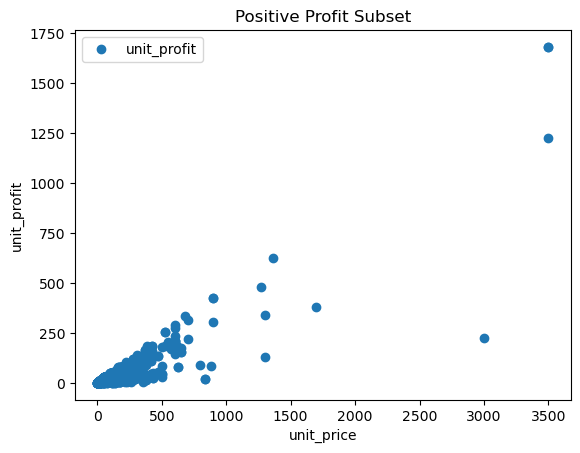

In [55]:
sub_test2.plot(x = 'unit_price', y='unit_profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Positive Profit Subset')  
plt.xlabel('unit_price')  
plt.ylabel('unit_profit')  
plt.show()

In [56]:
# reshape 

X_4 = sub_test2['unit_price'].values.reshape(-1,1)
y_4 = sub_test2['unit_profit'].values.reshape(-1,1)

In [57]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.3, random_state=0)

In [58]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_4, y_train_4)

LinearRegression()

In [59]:
# Predict.

y_predicted_4 = regression.predict(X_test_4)

In [60]:
rmse = mean_squared_error(y_test_4, y_predicted_4)
r2 = r2_score(y_test_4, y_predicted_4)

In [61]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.34216999]]
Mean squared error:  1768.8276727330822
R2 score:  0.62150213997948


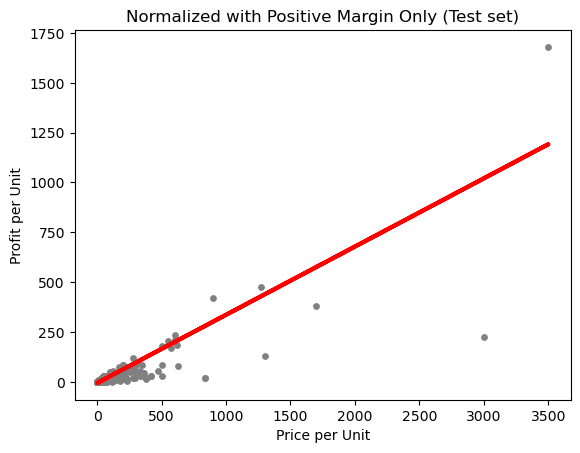

In [62]:
#visualize the test results 
plot_test = plt
plot_test.scatter(X_test_4, y_test_4, color='gray', s = 15)
plot_test.plot(X_test_4, y_predicted_4, color='red', linewidth =3)
plot_test.title('Normalized with Positive Margin Only (Test set)')
plot_test.xlabel('Price per Unit')
plot_test.ylabel('Profit per Unit')
plot_test.show()

In [63]:
data4 = pd.DataFrame({'Actual': y_test_4.flatten(), 'Predicted': y_predicted_4.flatten()})
data4.head(30)

,Actual,Predicted
0,6.132000,0.015998
1,1.078000,-4.924937
2,1.381125,-4.675153
3,18.767000,122.451264
4,4.968000,-2.437361
5,3.110400,-3.761559
6,5.725800,26.674462
7,2.215500,19.290433
8,21.495700,11.126257
9,15.254400,12.662601


#### summary statistics comparisons of test sets

total data set
>Slope: [[0.18159289]] <br>
Mean squared error:  53276.84984566039 <br>
R2 score:  0.3515636631065119 <br>


subset with outliers removed (> -200, <200), from total data set
>Slope: [[0.15643796]] <br>
Mean squared error:  10864.891249755918 <br>
R2 score:  0.2583026492637077 <br>



derived columns, normalizing for unit price and profit
>Slope: [[0.29314067]] <br>
Mean squared error:  890.3190875332812 <br>
R2 score:  0.7651946138378616 <br>



subset of positive profit only, from normalized data columns
>Slope: [[0.34216999]] <br>
Mean squared error:  1768.8276727330822 <br>
R2 score:  0.62150213997948 <br>

### Insight summary:
    *normalizing the data and removing negative profit increased the models fitness for the data
    *the results indicate that when normalized profit is positive, sales then has a functional relationship which is expected
    *profit increases with sales price, also profits can be predicted by sale price with 62% accuracy
    *the highly correlated features could lead to a biased model 
    *next steps are to understand what drives negative profits

In [64]:
#save file as csv
df.to_csv(r'C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 6\2 data\prepared data\task_6.4.csv')